#Plotting Graphs from AML Logged Run Metrics 

{'regularization rate': 0.5, 'accuracy': 0.9193}


{'runId': 'sklearn-mnist_1580169110_5a450450',
 'target': 'cpu-cluster',
 'status': 'Completed',
 'startTimeUtc': '2020-01-27T23:52:29.804754Z',
 'endTimeUtc': '2020-01-27T23:56:02.959086Z',
 'properties': {'_azureml.ComputeTargetType': 'amlcompute',
  'ContentSnapshotId': '546f63f9-48fb-4bea-9f9a-7450b19755a8',
  'azureml.git.repository_uri': 'https://github.com/Azure/MachineLearningNotebooks.git',
  'mlflow.source.git.repoURL': 'https://github.com/Azure/MachineLearningNotebooks.git',
  'azureml.git.branch': 'master',
  'mlflow.source.git.branch': 'master',
  'azureml.git.commit': '3588eb9665cab356b19c20d712286b58928018cc',
  'mlflow.source.git.commit': '3588eb9665cab356b19c20d712286b58928018cc',
  'azureml.git.dirty': 'True',
  'ProcessInfoFile': 'azureml-logs/process_info.json',
  'ProcessStatusFile': 'azureml-logs/process_status.json'},
 'inputDatasets': [{'dataset': {'id': '1017a612-e8e8-4cce-aae9-ccb7ccb7010f'}, 'consumptionDetails': {'type': 'RunInput', 'inputName': 'mnist_opend

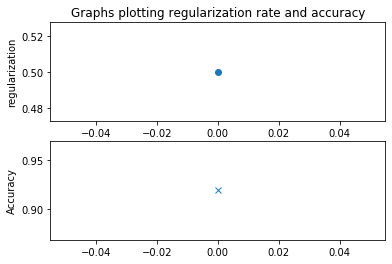

In [3]:
#plotting 2 scalar values logged from a run

from azureml.core import Workspace, Experiment, Run
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


ws = Workspace.from_config()

exp = Experiment(ws, "sklearn-mnist")
run = Run(exp, "sklearn-mnist_1580169110_5a450450")
run.get_details()

#get all metrics logged in run

metrics = run.get_metrics()
df = pd.DataFrame([metrics])
print(metrics)

x1 = np.linspace(0.0, 1.0)
x2 = np.linspace(0.0, 1.0)

y1 = np.linspace(0.0, 1.0) 
y2 = np.linspace(0.0, 1.0)

plt.subplot(2, 1, 1)
plt.plot(metrics['regularization rate'], marker='o')
plt.title('Graphs plotting regularization rate and accuracy')
plt.ylabel('regularization')

plt.subplot(2, 1, 2)
plt.plot(metrics['accuracy'], marker='x')
#plt.xlabel('time (s)')
plt.ylabel('Accuracy')


#plt.show()
run.get_details()
#print(run.get_details())


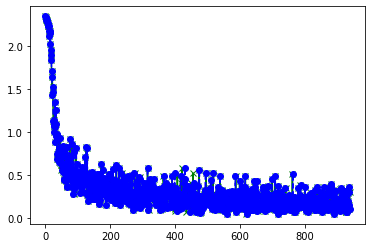

In [5]:
#plot two runs within an experiment on same graph

from azureml.core import Workspace, Experiment, Run 
import matplotlib.pyplot as plt 
import pandas as pd 

#get all metrics logged in run
ws = Workspace.get(name="Ignite2019",
               subscription_id='4aaa645c-5ae2-4ae9-a17a-84b9023bc56a')

exp = Experiment(ws, "pytorch-distributed-training" )
run1 = Run(exp, "pytorch-distributed-training_1580323231384")
run2 = Run(exp, "pytorch-distributed-training_1580235280_67b1cb5d")
run1.get_details()

#print(run.get_details())
metrics1 = run1.get_metrics()
metrics2 = run2.get_metrics()
#print(metrics)

plt.plot(metrics1['loss'], 'g',  marker='x', )
plt.plot(metrics2['loss'], '--b', marker='o')